In [1]:
import numpy as np
import h5py

In [6]:
collab_path = '../data/external/sebastien_dmap_emb/embedding_dense_res.sub-108.openmonitoring.npy'
collab_emb = np.load(collab_path, allow_pickle=True)

In [24]:
collab_emb.item()

{'lambdas': array([3.2288058 , 2.8264465 , 1.4287193 , 0.9867334 , 0.79078096],
       dtype=float32),
 'vectors': array([[ 7.2474079e-03, -1.7258307e-02, -4.9794731e-03,  7.2031501e-03,
         -1.3094742e-03,  1.9873139e-03],
        [ 7.2258394e-03, -2.3013515e-02, -1.2633905e-03,  1.0582031e-02,
          3.0057635e-03,  1.0140368e-03],
        [ 7.3480620e-03,  4.5435727e-03, -2.2849792e-03,  2.3844384e-03,
          6.7117955e-03,  1.0834305e-05],
        ...,
        [ 7.0525235e-03,  5.0457544e-03,  5.9392359e-03,  6.7407731e-03,
         -4.1178134e-03,  3.8948303e-04],
        [ 7.1465671e-03,  5.3210510e-03,  5.3487569e-03,  7.1667456e-03,
         -2.4303100e-03, -9.6954755e-04],
        [ 7.1747159e-03,  5.4107485e-03,  5.0762095e-03,  7.1364851e-03,
         -1.1487949e-03,  1.5582152e-04]], dtype=float32),
 'n_components': 5,
 'diffusion_time': array([0.01298114, 0.03238506, 0.51046985, 1.0192667 , 1.3326597 ],
       dtype=float32),
 'n_components_auto': 3}

In [34]:
collab_evecs = collab_emb.item()['vectors']

In [28]:
local_path = '/mnt/ssd3/ronan/data/dmap_replication-csv_01-09/n_sub-108_ses-1_task-openmonitoring_dmap.h5'
local_emb = h5py.File(local_path, 'r')

In [36]:
local_emb.keys()

<KeysViewHDF5 ['eigenvalues', 'latent', 'rank']>

In [32]:
np.asarray(local_emb['eigenvalues'])

array([3.26876136, 2.83740961, 1.45289738, 0.97486685, 0.76620759])

In [37]:
local_evecs = np.asarray(local_emb['latent'])

## Compare correlations

In [62]:
corrmat = np.corrcoef(collab_evecs, local_evecs, rowvar=False)[:5, 6:]
np.set_printoptions(precision=2)
print(corrmat)

[[ 0.2  -0.4  -0.07 -0.68 -0.01]
 [ 1.   -0.03 -0.02 -0.02 -0.03]
 [ 0.03  1.   -0.   -0.01 -0.01]
 [ 0.07  0.02  1.   -0.01 -0.03]
 [ 0.01  0.03 -0.01 -1.    0.11]]


## Compare visualizations

In [56]:
import sys; sys.path.append('../')
from src.plotting import visualize_embeddings, make_cbar

Ronan embeddings

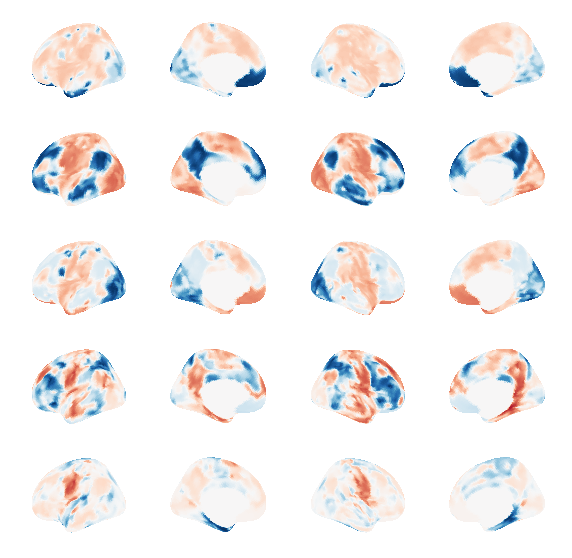

In [59]:
visualize_embeddings(local_evecs, n_embed=5)

Sebastien embeddings

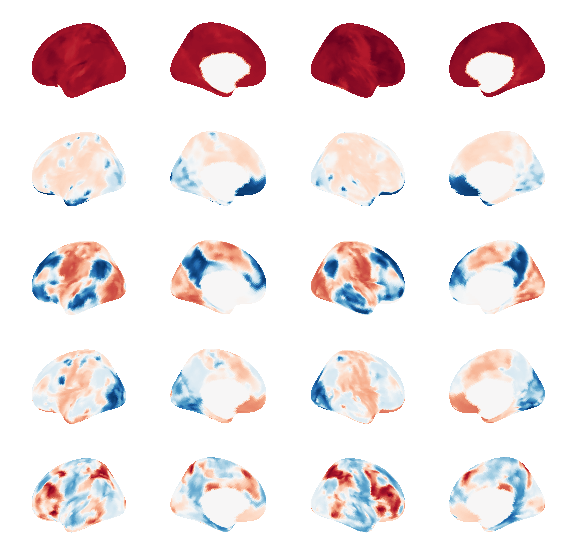

In [60]:
visualize_embeddings(collab_evecs, n_embed=5)

It appears that the latter embeddings contain the first (approximately constant) component which should be divided out by in the mapalign.py code (see here https://github.com/satra/mapalign/blob/master/mapalign/embed.py#L155).

This matches both the visualizations as well as the correlation matrix which has 1's shifted on the off-diagonal.